In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2_contingency

In [2]:
file_path = "online vs offline master only.xlsx"
excel_data = pd.ExcelFile(file_path)
excel_data.sheet_names

['online-master-only', 'offline-master-only', 'olp=0']

In [3]:
online_master_only = pd.read_excel(file_path, sheet_name='online-master-only')
offline_master_only = pd.read_excel(file_path, sheet_name='offline-master-only')

online_master_only.head(), online_master_only.head()

(   Age  Age Range Category Age Range  \
 0   54                   4     45-54   
 1   53                   4     45-54   
 2   39                   5     35-44   
 3   42                   5     35-44   
 4   43                   5     35-44   
 
                                  UI Degree(s)  Cumul Years of UI Giving  \
 0  U BUSN-Gies College of Business-MBA (2019)                         0   
 1                U BUSN-Accountancy-MS (2020)                         0   
 2  U BUSN-Gies College of Business-MBA (2020)                         0   
 3  U BUSN-Gies College of Business-MBA (2020)                         0   
 4                U BUSN-Accountancy-MS (2021)                         0   
 
    Gies Lifetime Giving as of 1/8/25  
 0                                  0  
 1                                  0  
 2                                  0  
 3                                  0  
 4                                  0  ,
    Age  Age Range Category Age Range  \
 0   54     

In [4]:
# Logistic Regression
X = sm.add_constant(df_combined['OLP Grad (Y/N)'])  # Independent variable: OLP status
y = df_combined['Donated']  # Dependent variable: Donation status

logit_model = sm.Logit(y, X)  # Fit logistic regression model
result = logit_model.fit()  # Run the logistic regression

# Display logistic regression results
print(result.summary())


NameError: name 'df_combined' is not defined

1.1. Compare the number of donations by OLP status across age groups (e.g., 25-34), using a histogram.

In [5]:
online_master_only_count_average = online_master_only.groupby('Age Range')['Cumul Years of UI Giving'].mean()
offline_master_only_count_average = offline_master_only.groupby('Age Range')['Cumul Years of UI Giving'].mean()

age_mapping = {
    '25-34': 1,
    '35-44': 2,
    '45-54': 3,
    '55-64': 4,
    '65-74': 5,
    '75-84': 6
}

numeric_index_online_master_only = online_master_only_count_average.index.astype(str).map(age_mapping)
numeric_index_offline_master_only = offline_master_only_count_average.index.astype(str).map(age_mapping)

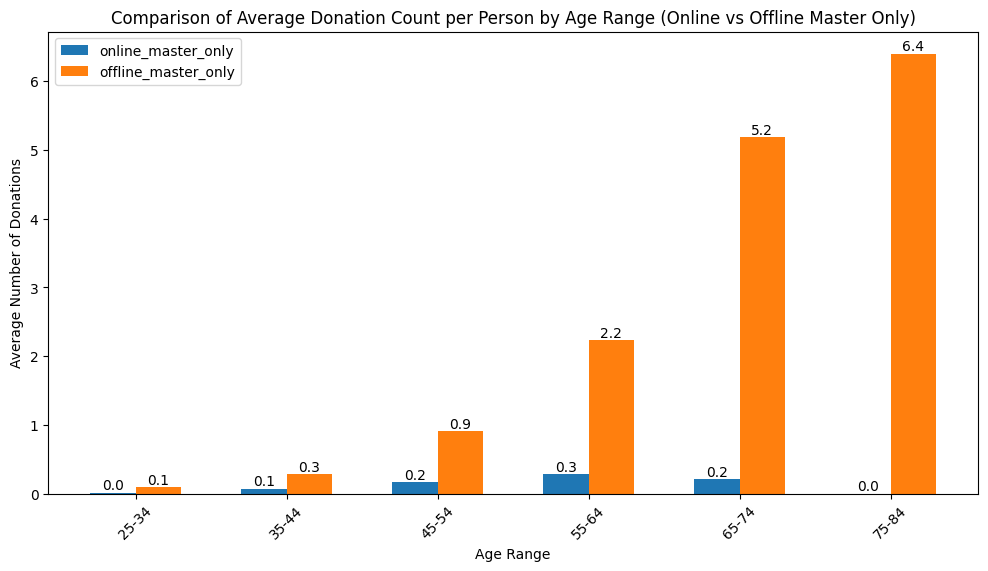

In [6]:
plt.figure(figsize=(12, 6))

bars1 = plt.bar(numeric_index_online_master_only - 0.15, online_master_only_count_average.values, width=0.3, label='online_master_only')
bars2 = plt.bar(numeric_index_offline_master_only + 0.15, offline_master_only_count_average.values, width=0.3, label='offline_master_only')

for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.1f}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Age Range')
plt.ylabel('Average Number of Donations')
plt.title('Comparison of Average Donation Count per Person by Age Range (Online vs Offline Master Only)')

plt.xticks(list(age_mapping.values()), list(age_mapping.keys()), rotation=45)

plt.legend()

plt.show()


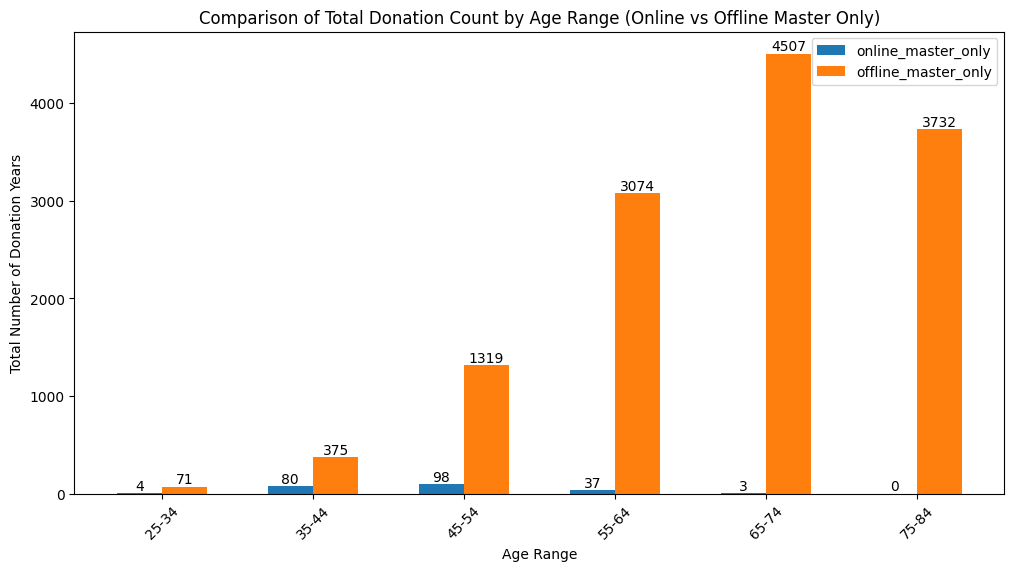

In [7]:
online_master_only_count_total = online_master_only.groupby('Age Range')['Cumul Years of UI Giving'].sum()
offline_master_only_count_total = offline_master_only.groupby('Age Range')['Cumul Years of UI Giving'].sum()

plt.figure(figsize=(12, 6))

bars1 = plt.bar(numeric_index_online_master_only - 0.15, online_master_only_count_total.values, width=0.3, label='online_master_only')
bars2 = plt.bar(numeric_index_offline_master_only + 0.15, offline_master_only_count_total.values, width=0.3, label='offline_master_only')

for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.0f}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.0f}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Age Range')
plt.ylabel('Total Number of Donation Years')
plt.title('Comparison of Total Donation Count by Age Range (Online vs Offline Master Only)')

plt.xticks(list(age_mapping.values()), list(age_mapping.keys()), rotation=45)

plt.legend()

plt.show()


1.2. Compare the distribution of total donation amounts by OLP status across age groups.

Following the approach above, compare the distribution of total donation amounts to identify any differences.

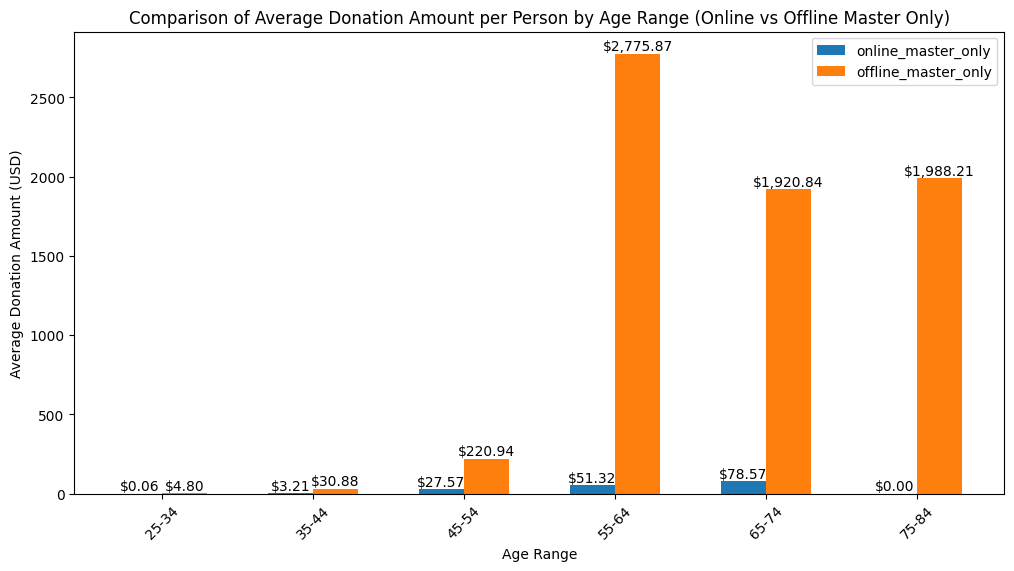

In [8]:
online_master_only_amount_average = online_master_only.groupby('Age Range')['Gies Lifetime Giving as of 1/8/25'].mean()
offline_master_only_amount_average = offline_master_only.groupby('Age Range')['Gies Lifetime Giving as of 1/8/25'].mean()

plt.figure(figsize=(12, 6))

bars1 = plt.bar(numeric_index_online_master_only - 0.15, online_master_only_amount_average.values, width=0.3, label='online_master_only')
bars2 = plt.bar(numeric_index_offline_master_only + 0.15, offline_master_only_amount_average.values, width=0.3, label='offline_master_only')

for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'${bar.get_height():,.2f}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'${bar.get_height():,.2f}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Age Range')
plt.ylabel('Average Donation Amount (USD)')
plt.title('Comparison of Average Donation Amount per Person by Age Range (Online vs Offline Master Only)')

plt.xticks(list(age_mapping.values()), list(age_mapping.keys()), rotation=45)

plt.legend()

plt.show()


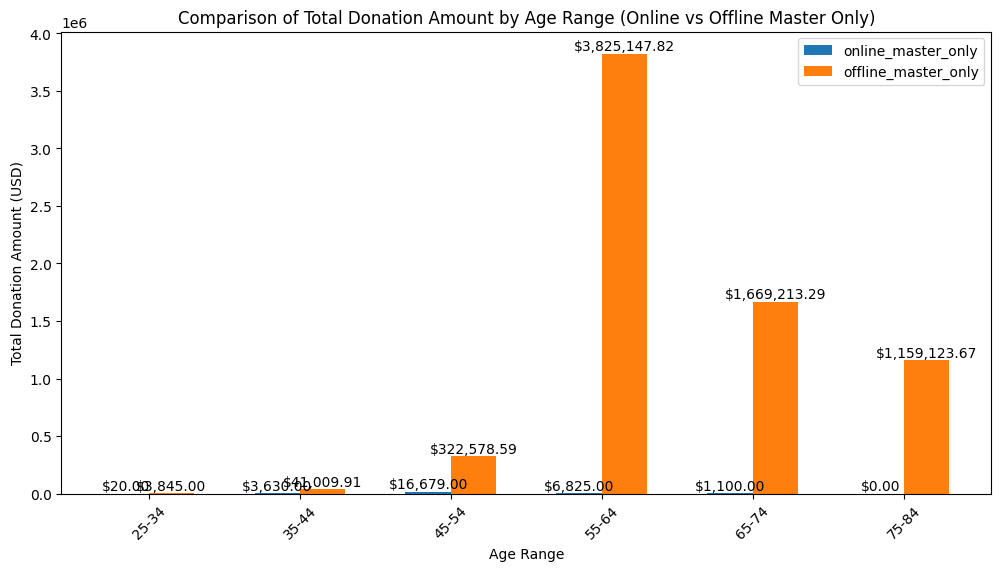

In [9]:
online_master_only_amount_total = online_master_only.groupby('Age Range')['Gies Lifetime Giving as of 1/8/25'].sum()
offline_master_only_amount_total = offline_master_only.groupby('Age Range')['Gies Lifetime Giving as of 1/8/25'].sum()

plt.figure(figsize=(12, 6))

bars1 = plt.bar(numeric_index_online_master_only - 0.15, online_master_only_amount_total.values, width=0.3, label='online_master_only')
bars2 = plt.bar(numeric_index_offline_master_only + 0.15, offline_master_only_amount_total.values, width=0.3, label='offline_master_only')

for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'${bar.get_height():,.2f}', ha='center', va='bottom', fontsize=10)

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'${bar.get_height():,.2f}', ha='center', va='bottom', fontsize=10)

plt.xlabel('Age Range')
plt.ylabel('Total Donation Amount (USD)')
plt.title('Comparison of Total Donation Amount by Age Range (Online vs Offline Master Only)')

plt.xticks(list(age_mapping.values()), list(age_mapping.keys()), rotation=45)

plt.legend()

plt.show()
